In [24]:
import torch
import PIL.Image as Image
from utils import ImagenetDataset
import torch.nn as nn
import matplotlib.pyplot as plt

In [123]:
def blur_conv2d_from_kernel(kernel, channels, device, stride=1):
    kernel_size = kernel.shape
    kernel = kernel/kernel.sum()
    kernel = kernel.repeat(3, 1, 1, 1) # [out_channels, in_channels, kernel_height, kernel_width]

    filter = nn.Conv2d(
        in_channels=channels, out_channels=channels,
        kernel_size=kernel_size, groups=channels, bias=False, stride=stride,
        # padding=kernel_size//2
    )
    filter.weight.data = kernel
    filter.weight.requires_grad = False     # fixed kernel

    return filter.to(device)

In [139]:
device = 'cpu'
test_image = Image.open('figs/test_image.png').convert("RGB")
test_image = ImagenetDataset([]).test_transform(test_image)     # convert image to tensor
channels, h, w = test_image.shape                               # get batch info
test_image = test_image.unsqueeze(0).to(device)                 # push batch to cpu

# create motion blur kernel
kernel_size = 20
kernel_motion_blur = torch.ones((1, kernel_size))
forward = blur_conv2d_from_kernel(kernel_motion_blur, channels, device)

# run convolution
y = forward(test_image)

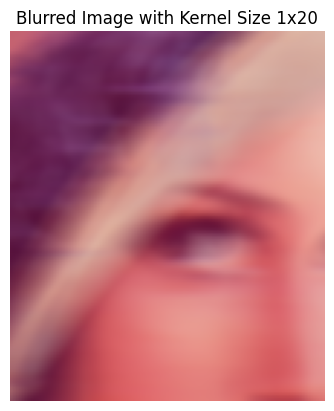

In [141]:
plt.imshow(y.permute(0, 2, 3, 1).squeeze().cpu())
plt.title(f'Blurred Image with Kernel Size 1x{kernel_size}') 
plt.axis('off')  # Hide the axis for better visualization (optional)
plt.show()